# Fake News Detector

## Installing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Loading the data

In [2]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

### Data Preview 

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
data_fake["class"]=0
data_true['class']=1

In [6]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

#### Creating a Manual Testing Dataset for Model Evaluation

In [7]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)
    
    

In [8]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [9]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\Debya\AppData\Local\Temp\ipykernel_7416\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\Debya\AppData\Local\Temp\ipykernel_7416\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [10]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


### Final Data

In [12]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


#### "title",  "subject" and "date" columns are not required for detecting the fake news, so we gonna drop them.

In [13]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [15]:
#count of missing values
data.isnull().sum() 

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [16]:
data = data.sample(frac = 1)

In [17]:
data.head()

,text,class
20782,If someone would have told me in 2008 that we ...,0
17329,A must read that pretty much tells you like it...,0
5167,WASHINGTON (Reuters) - U.S. House of Represent...,1
11910,LONDON (Reuters) - U.S. President Donald Trump...,1
14795,Have you ever noticed how DHS Director Jeh Joh...,0


In [18]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [19]:
data.columns

Index(['text', 'class'], dtype='object')

In [20]:
data.head()

,text,class
0,If someone would have told me in 2008 that we ...,0
1,A must read that pretty much tells you like it...,0
2,WASHINGTON (Reuters) - U.S. House of Represent...,1
3,LONDON (Reuters) - U.S. President Donald Trump...,1
4,Have you ever noticed how DHS Director Jeh Joh...,0


## Data Preprocessing

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [21]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [22]:
data['text'] = data['text'].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [23]:
x = data['text']
y = data['class']

#### Splitting the dataset into training set and testing set. 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

#### Convert text to vectors

In [25]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [26]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [27]:
LR.score(xv_test, y_test)

0.9859180035650624

#### GridSearchCV

In [28]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['saga'],  # Solver that supports l1 and elasticnet
    'max_iter': [100, 200]  # Number of iterations
}

In [29]:
# Create a GridSearchCV object with Logistic Regression model
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [30]:
# Fit the model on training data
grid_search.fit(xv_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Debya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='accuracy', verbose=2)

In [31]:
# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.9958108133516909


In [32]:
# Initialize the model with the best parameters
best_LR = grid_search.best_estimator_

# Train the model on the training set
best_LR.fit(xv_train, y_train)


C:\Users\Debya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, max_iter=200, penalty='l1', solver='saga')

In [33]:
# Evaluate on the test set
print(best_LR.score(xv_test, y_test))

0.9945632798573975


Évaluation de la Régression Logistique:
Accuracy: 0.9946
F1 Score: 0.9943
Precision: 0.9933
Recall: 0.9953
AUC: 0.9992


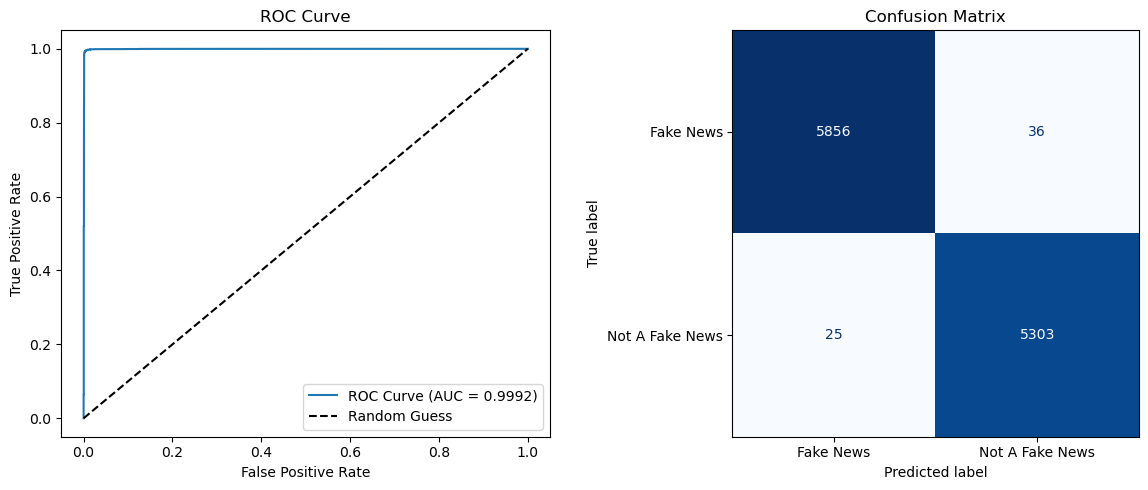

In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fonction pour évaluer un modèle avec différentes métriques
def evaluate_model(model, x_test, y_test):
    # Prédictions
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    if auc is not None:
        print(f"AUC: {auc:.4f}")
    
    return accuracy, f1, precision, recall, auc

# Fonction pour afficher la courbe ROC et la matrice de confusion côte à côte
def plot_evaluation_graphs(model, x_test, y_test):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Courbe ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        
        axs[0].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
        axs[0].plot([0, 1], [0, 1], 'k--', label='Random Guess')
        axs[0].set_xlabel('False Positive Rate')
        axs[0].set_ylabel('True Positive Rate')
        axs[0].set_title('ROC Curve')
        axs[0].legend(loc='lower right')
    else:
        print("Le modèle ne prend pas en charge les probabilités.")
    
    # Matrice de confusion
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake News", "Not A Fake News"])
    cm_display.plot(ax=axs[1], cmap="Blues", colorbar=False)
    axs[1].set_title("Confusion Matrix")

    plt.tight_layout()
    plt.show()

# Évaluation du modèle de régression logistique 
print("Évaluation de la Régression Logistique:")
evaluate_model(best_LR, xv_test, y_test)
plot_evaluation_graphs(best_LR, xv_test, y_test)


## Decision Tree Classifier

In [34]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [35]:
DT.score(xv_test, y_test)

0.9962566844919786

#### GridSearchCV

In [36]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],       # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5]        # Minimum number of samples required to be at a leaf node
}


In [37]:
# Create a GridSearchCV object with Decision Tree model
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


In [38]:
# Fit the model on training data
grid_search.fit(xv_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9957216470683571


In [39]:
best_DT = grid_search.best_estimator_

# Train the model on the training set
best_DT.fit(xv_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

In [40]:
# Evaluate on the test set
print("Accuracy:", best_DT.score(xv_test, y_test))

Accuracy: 0.9949197860962566


Évaluation de l'Arbre de Décision:
Accuracy: 0.9949
F1 Score: 0.9947
Precision: 0.9944
Recall: 0.9949
AUC: 0.9956


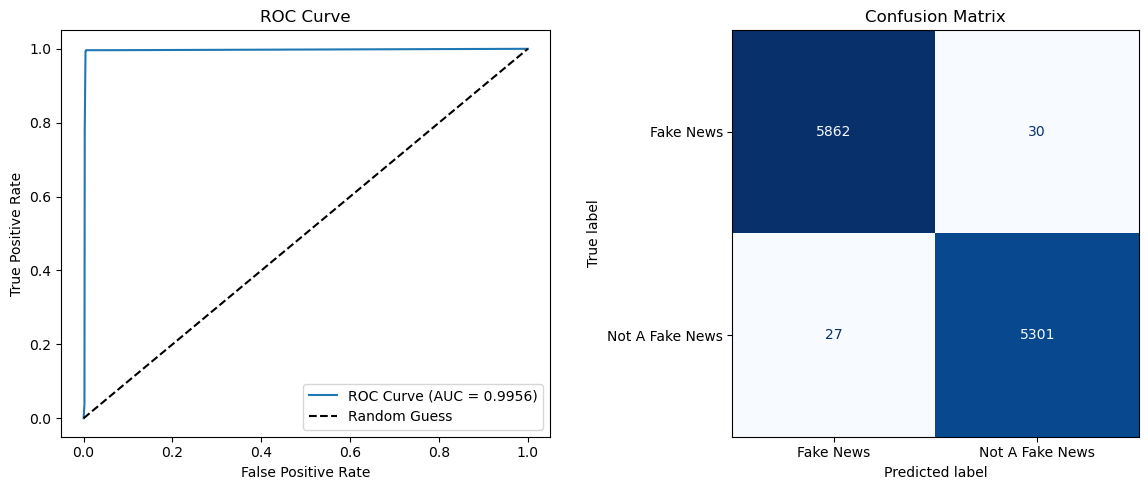

In [60]:
print("Évaluation de l'Arbre de Décision:")
evaluate_model(best_DT, xv_test, y_test)
plot_evaluation_graphs(best_DT, xv_test, y_test)

## Random Forest Classifier

In [41]:
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
pred_rf = RF.predict(xv_test)

In [43]:
RF.score(xv_test, y_test)

0.9890374331550802

#### GridSearchCV

In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],            # Number of trees in the forest
    'max_depth': [None, 10, 20],           # Maximum depth of each tree
    'min_samples_split': [2, 5],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],             # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],          # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                 # Whether to use bootstrap samples
}

In [45]:
# Create a GridSearchCV object with Random Forest Classifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [46]:
# Fit the model on training data
grid_search.fit(xv_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.9887395810464668


In [47]:
best_RF = grid_search.best_estimator_

# Train the model on the training set
best_RF.fit(xv_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=0)

In [48]:
# Evaluate on the test set
print("Accuracy:", best_RF.score(xv_test, y_test))

Accuracy: 0.9881461675579323


Évaluation de la Forêt d'Arbres Décisionnels:
Accuracy: 0.9881
F1 Score: 0.9875
Precision: 0.9874
Recall: 0.9876
AUC: 0.9989


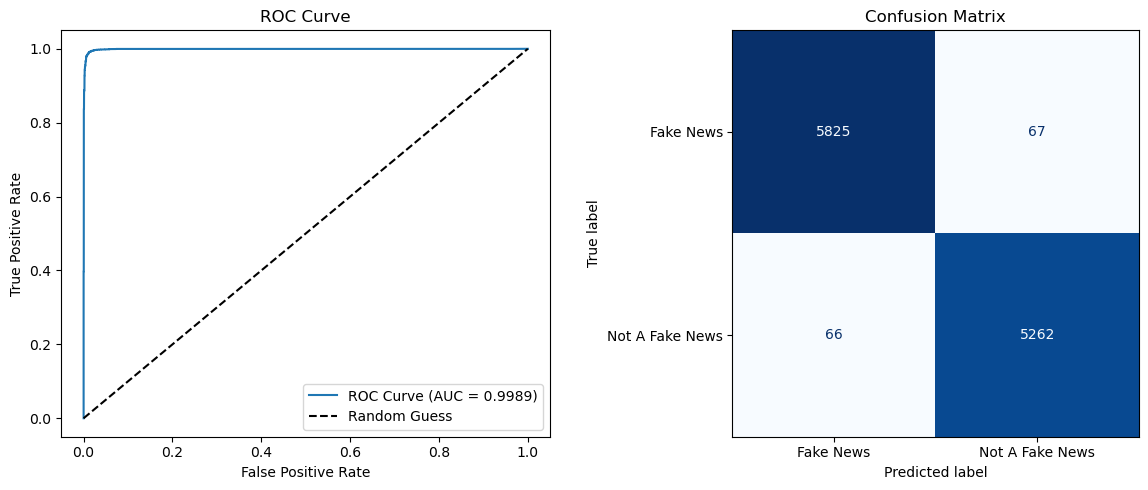

In [62]:
print("Évaluation de la Forêt d'Arbres Décisionnels:")
evaluate_model(best_RF, xv_test, y_test)
plot_evaluation_graphs(best_RF, xv_test, y_test)

## Testing the Model

In [49]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)  
    new_xv_test = vectorization.transform(new_def_test["text"])  
    
    pred_LR = best_LR.predict(new_xv_test)
    
    return print("Best LR Prediction:", output_label(pred_LR[0]))


In [50]:
fake_example = data_fake_manual_testing.iloc[0]['text']  
true_example = data_true_manual_testing.iloc[0]['text']  

print("Testing with a Fake News example:")
manual_testing(fake_example)

print("\nTesting with a Not A Fake News example:")
manual_testing(true_example)


Testing with a Fake News example:
Best LR Prediction: Fake News

Testing with a Not A Fake News example:
Best LR Prediction: Not A Fake News


In [63]:
# Fonction pour convertir les prédictions en étiquettes lisibles
def output_label(n):
    return "Fake News" if n == 0 else "Not A Fake News"

# Fonction pour effectuer le test manuel sur plusieurs modèles
def manual_testing(news, models):
    # Préparer le texte pour le modèle
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)  
    new_xv_test = vectorization.transform(new_def_test["text"])  
    
    # Effectuer les prédictions pour chaque modèle et afficher les résultats
    for model_name, model in models.items():
        pred = model.predict(new_xv_test)
        print(f"{model_name} Prediction: {output_label(pred[0])}")

# Initialisation des modèles avec leurs noms pour faciliter l'affichage
models = {
    "Logistic Regression": best_LR,
    "Decision Tree": best_DT,
    "Random Forest": best_RF
}

# Exemples de test
fake_example = data_fake_manual_testing.iloc[0]['text']
true_example = data_true_manual_testing.iloc[0]['text']

# Tester avec un exemple de Fake News
print("Testing with a Fake News example:")
manual_testing(fake_example, models)

# Tester avec un exemple de Not A Fake News
print("\nTesting with a Not A Fake News example:")
manual_testing(true_example, models)


Testing with a Fake News example:
Logistic Regression Prediction: Fake News
Decision Tree Prediction: Fake News
Random Forest Prediction: Fake News

Testing with a Not A Fake News example:
Logistic Regression Prediction: Not A Fake News
Decision Tree Prediction: Not A Fake News
Random Forest Prediction: Not A Fake News


In [65]:
# Fonction modifiée pour afficher les prédictions pour tous les exemples externes
def test_on_external_data(model, data, label_name="class"):
    correct_predictions = 0
    total = len(data)
    
    print(f"Testing {type(model).__name__} on external dataset...\n")
    for idx, row in data.iterrows():
        text = row['text']
        true_label = row[label_name]
        
        # Prétraitement du texte
        processed_text = vectorization.transform([wordopt(text)])
        
        # Prédiction du modèle
        pred = model.predict(processed_text)[0]
        
        # Afficher la prédiction
        predicted_label = output_label(pred)
        actual_label = output_label(true_label)
        
        # Vérifier si la prédiction est correcte
        if pred == true_label:
            correct_predictions += 1
        
        print(f"Text: {text[:50]}...")  # Affiche les 50 premiers caractères du texte
        print(f"Actual: {actual_label} | Predicted: {predicted_label}")
        print("-" * 50)
    
    # Afficher le pourcentage de prédictions correctes
    accuracy = correct_predictions / total
    print(f"\nAccuracy on external data: {accuracy:.4f} ({correct_predictions}/{total} correct predictions)")



In [66]:
print("Testing Logistic Regression model:")
test_on_external_data(best_LR, pd.concat([data_fake_manual_testing, data_true_manual_testing]))

Testing Logistic Regression model:
Testing LogisticRegression on external dataset...

Text: 21st Century Wire says This week, the historic int...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text:  By Dady Chery and Gilbert MercierAll writers with...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: Vic Bishop Waking TimesOur reality is carefully co...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: Paul Craig RobertsIn the last years of the 20th ce...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: Robert Fantina CounterpunchAlthough the United Sta...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: 21st Century Wire says As 21WIRE reported earlier ...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Te

In [67]:
print("\nTesting Decision Tree model:")
test_on_external_data(best_DT, pd.concat([data_fake_manual_testing, data_true_manual_testing]))


Testing Decision Tree model:
Testing DecisionTreeClassifier on external dataset...

Text: 21st Century Wire says This week, the historic int...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text:  By Dady Chery and Gilbert MercierAll writers with...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: Vic Bishop Waking TimesOur reality is carefully co...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: Paul Craig RobertsIn the last years of the 20th ce...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: Robert Fantina CounterpunchAlthough the United Sta...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: 21st Century Wire says As 21WIRE reported earlier ...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Tex

In [68]:
print("\nTesting Random Forest model:")
test_on_external_data(best_RF, pd.concat([data_fake_manual_testing, data_true_manual_testing]))


Testing Random Forest model:
Testing RandomForestClassifier on external dataset...

Text: 21st Century Wire says This week, the historic int...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text:  By Dady Chery and Gilbert MercierAll writers with...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: Vic Bishop Waking TimesOur reality is carefully co...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: Paul Craig RobertsIn the last years of the 20th ce...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: Robert Fantina CounterpunchAlthough the United Sta...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Text: 21st Century Wire says As 21WIRE reported earlier ...
Actual: Fake News | Predicted: Fake News
--------------------------------------------------
Tex